In [162]:
import random
import numpy as np
import pandas as pd
from plotDecBoundaries import plotDecBoundaries as pDB

# Problem 2

In [163]:
syn_train_df1 = pd.read_csv('synthetic1_train.csv', header=None)
syn_test_df1 = pd.read_csv('synthetic1_test.csv', header=None)
syn1_train = syn_train_df1.to_numpy()
syn1_test = syn_test_df1.to_numpy()

syn_train_df2 = pd.read_csv('synthetic2_train.csv', header=None)
syn_test__df2 = pd.read_csv('synthetic2_test.csv', header=None)
syn2_train = syn_train_df2.to_numpy()
syn2_test = syn_test__df2.to_numpy()

In [165]:
class Perceptron:

    def __init__(self, X_train, y_train, X_test, y_test, n_iter=10000):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.n_iter = n_iter

    def _initialize(self):
        self.w = np.zeros((self.X_train.shape[1],))
        
        a = 0.1
        self.w += a

        categs = np.unique(self.y_train)
        self.z = np.array([1 if val == categs[0] else -1 for val in self.y_train])

    def _criterion(self, w_):
        sum = 0
        for x, z in zip(self.X_train, self.z):
            cond = z*np.matmul(w_.T, x)
            indicator = (cond <= 0)*cond
            sum += indicator
        
        return -1*sum

    def _shuffle(self):
        idx = random.sample(range(self.X_train.shape[0]), self.X_train.shape[0])

        temp_X = np.take(self.X_train, idx, axis=0)
        temp_y = np.take(self.y_train, idx)
        temp_z = np.take(self.z, idx)

        self.X_train = temp_X
        self.y = temp_y
        self.z = temp_z

    def fit(self, tol=1e-10):
        self._initialize()
        self._shuffle()
        m = 1
        eta = 1

        last_500_w = []
        last_500_crit = []
        prev_w = np.zeros(self.w.shape)
        last_w = np.zeros(self.w.shape)
        best_w = np.zeros(self.w.shape)
        min_crit = 1e10
        converged = False

        while not np.allclose(prev_w, self.w, atol=tol):
            prev_w = np.copy(self.w)
            i_copy = 0
            for n, (x, z) in enumerate(zip(self.X_train, self.z)):
                i = (m-1)*self.X_train.shape[0]+n
                i_copy = i
                if self.n_iter-500 <= i < self.n_iter:
                    last_500_w.append(self.w)
                    last_500_crit.append(self._criterion(self.w))
                elif i == self.n_iter:
                    min_crit = min(last_500_crit)
                    min_idx = last_500_crit.index(min_crit)
                    best_w = last_500_w[min_idx]
                    last_w = prev_w
                    break

                cond = (z*np.matmul(self.w.T, x) <= 0)
                self.w += eta*z*x*cond

                if abs(self._criterion(self.w) - 0) <= tol:
                    print('data is linearly separable')
                    prev_w = np.copy(self.w)
                    best_w = np.copy(self.w)
                    min_crit = self._criterion(best_w)
                    converged = True
                    break
            
            m += 1

            if i_copy == self.n_iter:
                if np.allclose(last_w, self.w, atol=tol):
                    converged = True
                    break
            elif i_copy < self.n_iter:
                if np.allclose(prev_w, self.w, atol=tol):
                    converged = True
                    break
            else:
                converged = False
                break

        return best_w, min_crit, converged

    def predict(self, best_w, X):
        y_pred = np.zeros((X.shape[0],))
        categs = np.unique(self.y_train)
        for i, x in enumerate(X):
            cond = np.matmul(best_w.T, x)
            if cond > 0:
                y_pred[i] = categs[0]
            else:
                y_pred[i] = categs[1]

        return y_pred

    def error(self, y_pred, y_true):
        num = 0
        for yp, yt in zip(y_pred, y_true):
            if yp != yt:
                num += 1

        return num/np.size(y_pred)

## Part a)

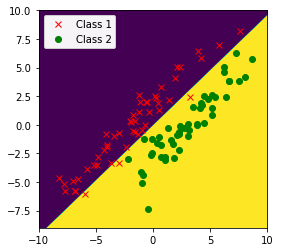

The best resulting weight vector is [-40.29586  41.90496].
The best resulting criterion value is 44.7838445159999.
The algorithm converged.
The training error rate on the first synthetic dataset is: 0.03
The testing error rate on the first synthetic dataset is: 0.03


In [166]:
X_train_syn1 = syn1_train[:, :2]
y_train_syn1 = syn1_train[:, 2]

X_test_syn1 = syn1_test[:, :2]
y_test_syn1 = syn1_test[:, 2]

pc = Perceptron(X_train_syn1, y_train_syn1, X_test_syn1, y_test_syn1)
best_w, min_crit, converged = pc.fit()
y_pred_train = pc.predict(best_w, X_train_syn1)
y_pred_test = pc.predict(best_w, X_test_syn1)
train_error_rate1 = pc.error(y_pred_train, y_train_syn1)
test_error_rate1 = pc.error(y_pred_test, y_test_syn1)

pDB(X_train_syn1, y_train_syn1, best_w)

print(f"The best resulting weight vector is {best_w}.\nThe best resulting criterion value is {min_crit}.")
if converged:
    print("The algorithm converged.")
else:
    print("The algorithm halted without convergence.")

print(f"The training error rate on the first synthetic dataset is: {train_error_rate1}")
print(f"The testing error rate on the first synthetic dataset is: {test_error_rate1}")

## Part b)

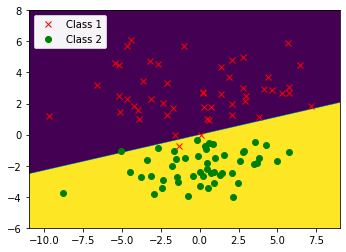

The best resulting weight vector is [-2.9823   13.022124].
The best resulting criterion value is 6.570271306356059.
The algorithm converged.
The training error rate on the second synthetic dataset is: 0.03
The testing error rate on the second synthetic dataset is: 0.03


In [167]:
X_train_syn2 = syn2_train[:, :2]
y_train_syn2 = syn2_train[:, 2]

X_test_syn2 = syn2_test[:, :2]
y_test_syn2 = syn2_test[:, 2]

pc = Perceptron(X_train_syn2, y_train_syn2, X_test_syn2, y_test_syn2)
best_w, min_crit, converged = pc.fit()
y_pred_train = pc.predict(best_w, X_train_syn2)
y_pred_test = pc.predict(best_w, X_test_syn2)
train_error_rate2 = pc.error(y_pred_train, y_train_syn2)
test_error_rate2 = pc.error(y_pred_test, y_test_syn2)

pDB(X_train_syn2, y_train_syn2, best_w)

print(f"The best resulting weight vector is {best_w}.\nThe best resulting criterion value is {min_crit}.")
if converged:
    print("The algorithm converged.")
else:
    print("The algorithm halted without convergence.")

print(f"The training error rate on the second synthetic dataset is: {train_error_rate2}")
print(f"The testing error rate on the second synthetic dataset is: {test_error_rate2}")

## Part c)

In [172]:
wine_train_df = pd.read_csv('wine_train.csv', header=None)
wine_test_df = pd.read_csv('wine_test.csv', header=None)
wine_train = wine_train_df.to_numpy()
wine_test = wine_test_df.to_numpy()

X_train_wine = wine_train[:, :13][np.logical_or(wine_train[:, 13] == 1, wine_train[:, 13] == 2)]
y_train_wine = wine_train[:, 13][np.logical_or(wine_train[:, 13] == 1, wine_train[:, 13] == 2)]

X_test_wine = wine_test[:, :13][np.logical_or(wine_test[:, 13] == 1, wine_test[:, 13] == 2)]
y_test_wine = wine_test[:, 13][np.logical_or(wine_test[:, 13] == 1, wine_test[:, 13] == 2)]

pc = Perceptron(X_train_wine, y_train_wine, X_test_wine, y_test_wine)
best_w, min_crit, converged = pc.fit()
y_pred_train = pc.predict(best_w, X_train_wine)
y_pred_test = pc.predict(best_w, X_test_wine)
train_error_rate = pc.error(y_pred_train, y_train_wine)
test_error_rate = pc.error(y_pred_test, y_test_wine)

print(f"The best resulting weight vector is {best_w}.\nThe best resulting criterion value is {min_crit}.")
if converged:
    print("The algorithm converged.")
else:
    print("The algorithm halted without convergence.")

print(f"The training error rate on the wine dataset is: {train_error_rate}")
print(f"The testing error rate on the wine dataset is: {test_error_rate}")

The best resulting weight vector is [ -2878.1     -374.28    -318.24   -6530.9   -15548.9     -327.39
    139.64    -130.1     -123.14     117.45    -221.658   -339.94
   2316.1  ].
The best resulting criterion value is 1065449.4791199996.
The algorithm halted without convergence.
The training error rate on the wine dataset is: 0.07692307692307693
The testing error rate on the wine dataset is: 0.13846153846153847


# The data is not linearly separable. This is evident because the criterion function never gets close to zero when evaluated with the last 500 iterations. Furthermore, if the data were linearly separable, then the criterion function would be zero and so the training error rate should be zero as well since a zero criterion function implies that all points are classified correctly.